# Unemployment Analysis from 1976-2023

## 1. Data Loading & Initial Exploration

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import kagglehub
import os
from datetime import datetime, timedelta

In [1]:
!pip install kagglehub

In [14]:
from kagglehub import KaggleDatasetAdapter
df_2023 = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "pienik/unemployment-in-canada-by-province-1976-present",
    "Unemployment_Canada_1976_present.csv"
)

In [15]:
df_2023.columns = df_2023.columns.str.strip()
df.columns


Index(['REF_DATE', 'GEO', 'Age group', 'Employment', 'Employment rate',
       'Full-time employment', 'Labour force', 'Part-time employment',
       'Participation rate', 'Population', 'Unemployment',
       'Unemployment rate'],
      dtype='object', name='Labour force characteristics')

In [16]:
# Adjust the folder path where your monthly CSVs are stored
folder_path = r"C:\Users\PROPIETARIO\Documents\Final_project\data_um"

# Define the date range
start_date = datetime(2023, 2, 1)
end_date = datetime(2025, 4, 1)

# Function to generate all monthly file names in the format "MM-YYYY.csv"
def generate_monthly_filenames(start, end):
    filenames = []
    current = start
    while current <= end:
        filename = current.strftime("%m-%Y") + ".csv"
        filenames.append(filename)
        current += timedelta(days=32)
        current = current.replace(day=1)
    return filenames

# Loop through files and load + reshape
all_data = []

for filename in generate_monthly_filenames(start_date, end_date):
    file_path = os.path.join(folder_path, filename)
    if os.path.exists(file_path):
        try:
            df_m = pd.read_csv(file_path)

            # Drop irrelevant columns (adjust as needed)
            df_m.drop(["DGUID", 'Gender', 'Data type', 'UOM', 'UOM_ID',
                     'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
                     'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1, inplace=True)

            # Pivot: move "Labour force characteristics" to columns
            df_pivoted = df_m.pivot_table(
                index=["REF_DATE", "GEO", "Age group"],
                columns="Labour force characteristics",
                values="VALUE"
            ).reset_index()

            all_data.append(df_pivoted)
        except Exception as e:
            print(f" Error processing {filename}: {e}")
    else:
        print(f" File not found: {filename}")

# 🧩 Merge all monthly data
if all_data:
    df_plus = pd.concat(all_data, ignore_index=True)
    print("All files processed and merged.")
else:
    print("No data loaded.")




All files processed and merged.


In [17]:
df_plus.columns.name = None  # Remove pivot column name

    # Append to main dataset
df = pd.concat([df_2023, df_plus], ignore_index=True)


In [18]:
df.head()

,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
0,1976-01,Alberta,Both sexes,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1
1,1976-01,Alberta,Both sexes,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2
2,1976-01,Alberta,Both sexes,15 years and over,819500.0,693700.0,856500.0,125800.0,1276700.0,37000.0,64.2,67.1,4.3
3,1976-01,Alberta,Both sexes,25 to 54 years,491400.0,439800.0,505800.0,51600.0,661700.0,14400.0,74.3,76.4,2.8
4,1976-01,Alberta,Both sexes,25 years and over,587700.0,518800.0,604200.0,68900.0,914400.0,16500.0,64.3,66.1,2.7


In [20]:
print(df.shape)
df.dtypes

(39606, 13)


REF_DATE                 object
GEO                      object
Sex                      object
Age group                object
Employment              float64
Full-time employment    float64
Labour force            float64
Part-time employment    float64
Population              float64
Unemployment            float64
Employment rate         float64
Participation rate      float64
Unemployment rate       float64
dtype: object

In [21]:
print(df.isnull().sum())

REF_DATE                   0
GEO                        0
Sex                      621
Age group                  0
Employment                 0
Full-time employment    1722
Labour force               0
Part-time employment    1723
Population                 0
Unemployment               6
Employment rate            0
Participation rate         0
Unemployment rate          6
dtype: int64


In [22]:
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    uniques = df[col].unique()
    print(f"Column `{col}` – {len(uniques)} unique value(s):")
    print(uniques)
    print("-" * 40)

Column `REF_DATE` – 592 unique value(s):
['1976-01' '1976-02' '1976-03' '1976-04' '1976-05' '1976-06' '1976-07'
 '1976-08' '1976-09' '1976-10' '1976-11' '1976-12' '1977-01' '1977-02'
 '1977-03' '1977-04' '1977-05' '1977-06' '1977-07' '1977-08' '1977-09'
 '1977-10' '1977-11' '1977-12' '1978-01' '1978-02' '1978-03' '1978-04'
 '1978-05' '1978-06' '1978-07' '1978-08' '1978-09' '1978-10' '1978-11'
 '1978-12' '1979-01' '1979-02' '1979-03' '1979-04' '1979-05' '1979-06'
 '1979-07' '1979-08' '1979-09' '1979-10' '1979-11' '1979-12' '1980-01'
 '1980-02' '1980-03' '1980-04' '1980-05' '1980-06' '1980-07' '1980-08'
 '1980-09' '1980-10' '1980-11' '1980-12' '1981-01' '1981-02' '1981-03'
 '1981-04' '1981-05' '1981-06' '1981-07' '1981-08' '1981-09' '1981-10'
 '1981-11' '1981-12' '1982-01' '1982-02' '1982-03' '1982-04' '1982-05'
 '1982-06' '1982-07' '1982-08' '1982-09' '1982-10' '1982-11' '1982-12'
 '1983-01' '1983-02' '1983-03' '1983-04' '1983-05' '1983-06' '1983-07'
 '1983-08' '1983-09' '1983-10' '1983

In [23]:
null_rows = df[df.isnull().any(axis=1)]
obj_cols = null_rows.select_dtypes(include='object').columns
for col in obj_cols:
    uniques = null_rows[col].unique()
    print(f"Column `{col}` – {len(uniques)} unique value(s):")
    print(uniques)
    print("-" * 40)

Column `REF_DATE` – 592 unique value(s):
['1976-01' '1976-02' '1976-03' '1976-04' '1976-05' '1976-06' '1976-07'
 '1976-08' '1976-09' '1976-10' '1976-11' '1976-12' '1977-01' '1977-02'
 '1977-03' '1977-04' '1977-05' '1977-06' '1977-07' '1977-08' '1977-09'
 '1977-10' '1977-11' '1977-12' '1978-01' '1978-02' '1978-03' '1978-04'
 '1978-05' '1978-06' '1978-07' '1978-08' '1978-09' '1978-10' '1978-11'
 '1978-12' '1979-01' '1979-02' '1979-03' '1979-04' '1979-05' '1979-06'
 '1979-07' '1979-08' '1979-09' '1979-10' '1979-11' '1979-12' '1980-01'
 '1980-02' '1980-03' '1980-04' '1980-05' '1980-06' '1980-07' '1980-08'
 '1980-09' '1980-10' '1980-11' '1980-12' '1981-01' '1981-02' '1981-03'
 '1981-04' '1981-05' '1981-06' '1981-07' '1981-08' '1981-09' '1981-10'
 '1981-11' '1981-12' '1982-01' '1982-02' '1982-03' '1982-04' '1982-05'
 '1982-06' '1982-07' '1982-08' '1982-09' '1982-10' '1982-11' '1982-12'
 '1983-01' '1983-02' '1983-03' '1983-04' '1983-05' '1983-06' '1983-07'
 '1983-08' '1983-09' '1983-10' '1983

In [24]:
null_rows[null_rows["GEO"].isin(["Saskatchewan", "Alberta", "Prince Edward Island"])].head(20)

,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
206,1976-03,Saskatchewan,Both sexes,55 years and over,57800.0,48900.0,58100.0,9000.0,180800.0,NaN,32.0,32.1,NaN
344,1976-05,Saskatchewan,Both sexes,55 years and over,61600.0,49700.0,62000.0,11900.0,181600.0,NaN,33.9,34.1,NaN
695,1976-11,Alberta,Both sexes,55 years and over,94300.0,80800.0,95000.0,13500.0,262400.0,NaN,35.9,36.2,NaN
3317,1980-01,Alberta,Both sexes,55 years and over,99100.0,84000.0,100500.0,15100.0,289600.0,NaN,34.2,34.7,NaN
3920,1980-09,Prince Edward Island,Both sexes,55 years and over,6100.0,5200.0,6300.0,900.0,24200.0,NaN,25.2,26.0,NaN
3989,1980-10,Prince Edward Island,Both sexes,55 years and over,6100.0,4800.0,6200.0,1300.0,24200.0,NaN,25.2,25.6,NaN
38985,2023-02,Alberta,NaN,15 to 24 years,310.3,173.2,350.1,137.1,540.9,39.8,57.4,64.7,11.4
38986,2023-02,Alberta,NaN,25 to 54 years,1617.0,1425.3,1706.5,191.8,1926.2,89.4,83.9,88.6,5.2
39002,2023-02,Prince Edward Island,NaN,15 to 24 years,12.8,8.5,14.6,4.2,22.6,1.8,56.6,64.6,12.3
39003,2023-02,Prince Edward Island,NaN,25 to 54 years,52.8,47.5,55.9,5.3,63.0,3.1,83.8,88.7,5.5


At this point. 1.- We could see that the missing values are specific for all the records with the ages 15-19, 20-24 and 55-64 from the entire country. This could be scope by eliminating the rows with null values as the proportion with the data is not huge and the records will turn into consistent data withing provinces. 2.- The rest null values can be filled with the next relations: Unemployment = Labour force - Employment ; Unemployment rate = 100*(Unemployment/Labour force). 3.-The column Sex will be eliminated as it doesnt provide any usefull data.4.- Ref_dates will be changed to datetime an as an index to treat this data as a timeseries.

## 2. Data Cleaning

In [25]:
df = df.dropna(subset=['Full-time employment', 'Part-time employment'])
missing_unemployment = df['Unemployment'].isna()
df.loc[missing_unemployment, 'Unemployment'] = (df.loc[missing_unemployment, 'Labour force'] - df.loc[missing_unemployment, 'Employment'])
missing_unemp_rate = df['Unemployment rate'].isna()
df.loc[missing_unemp_rate, 'Unemployment rate'] = (
    100 * df.loc[missing_unemp_rate, 'Unemployment'] / df.loc[missing_unemp_rate, 'Labour force']
)

In [26]:
print(df.isnull().sum())

REF_DATE                  0
GEO                       0
Sex                     594
Age group                 0
Employment                0
Full-time employment      0
Labour force              0
Part-time employment      0
Population                0
Unemployment              0
Employment rate           0
Participation rate        0
Unemployment rate         0
dtype: int64


In [27]:
df.drop(columns=["Sex"], inplace=True)

## 3. Exploratory Analysis & Visualizations

### A) Canada

In [43]:
# Group by Age group and get descriptive stats for Unemployment rate
canada_df = df[df['GEO'] == 'Canada'] 
desc_stats = (
    canada_df[['Age group', 'Unemployment rate']].where(df["Age group"].isin(["15 to 24 years", "25 to 54 years", "55 years and over"]))
    .groupby('Age group')
    .describe())
print(desc_stats)

                  Unemployment rate                                        \
                              count       mean       std  min   25%   50%   
Age group                                                                   
15 to 24 years                592.0  13.791723  2.535444  9.0  12.1  13.5   
25 to 54 years                592.0   6.821453  1.620322  4.0   5.7   6.3   
55 years and over             565.0   6.160177  1.329516  3.3   5.2   6.0   

                                 
                      75%   max  
Age group                        
15 to 24 years     15.000  30.3  
25 to 54 years      7.725  12.0  
55 years and over   6.900  11.7  


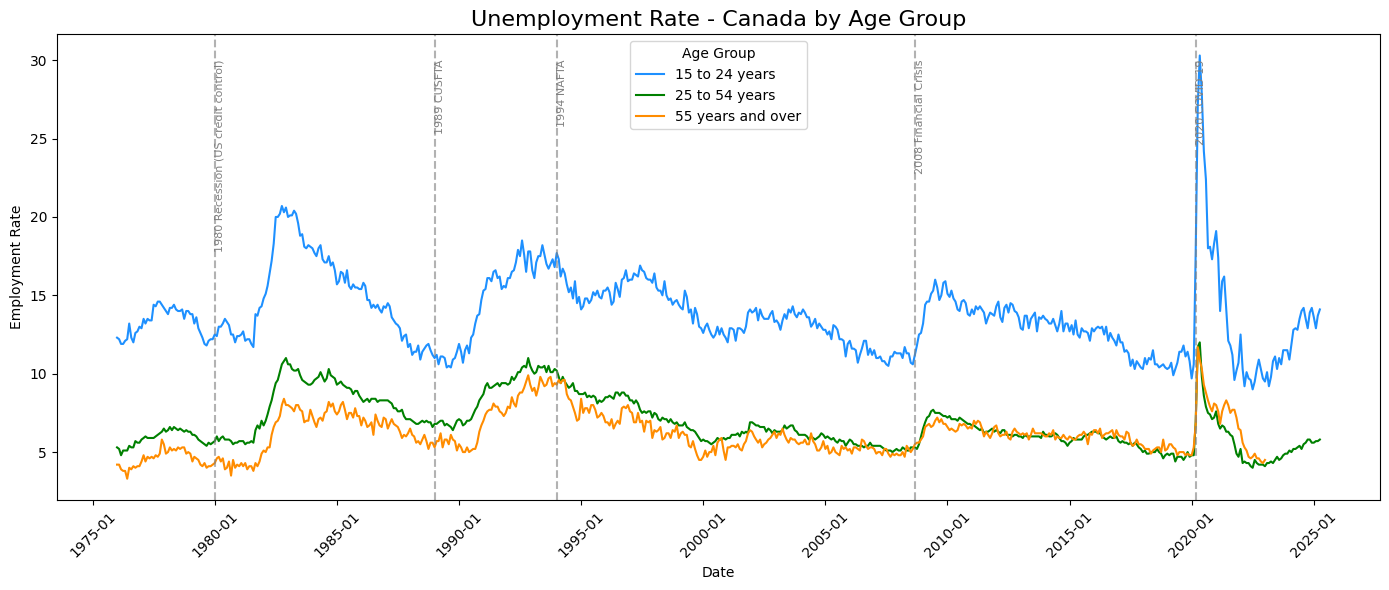

In [30]:
# Define age groups and assign colors
age_groups = ["15 to 24 years", "25 to 54 years", "55 years and over"]
colors = {"15 to 24 years": "dodgerblue","25 to 54 years": "green","55 years and over": "darkorange"}
events = {
    "1980 Recession (US credit control)": "1980-01",
    "1989 CUSFTA": "1989-01",
    "1994 NAFTA": "1994-01",
    "2008 Financial Crisis": "2008-09",
    "2020 COVID-19": "2020-03"
}
plt.figure(figsize=(14, 6))

# Loop through each age group
for age in age_groups:
    serie = df[(df['GEO'] == 'Canada') & (df['Age group'] == age)]
    serie = serie.sort_values(by='REF_DATE')
    serie['REF_DATE'] = pd.to_datetime(serie['REF_DATE'])
    # Plot
    plt.plot(serie['REF_DATE'],serie['Unemployment rate'],label=age,color=colors[age],linestyle='-')
# Add historical event markers
for label, date_str in events.items():
    date = pd.to_datetime(date_str)
    plt.axvline(date, color='gray', linestyle='--', alpha=0.6)
    plt.text(date, plt.ylim()[1] * 0.95, label, rotation=90, fontsize=8, color='gray', va='top')
    # Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))         # every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Year-Month
# Set title and labels
plt.title("Unemployment Rate - Canada by Age Group", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Employment Rate")
plt.legend(title="Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\PROPIETARIO\AppData\Local\Temp\ipykernel_14452\756135799.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=canada_df, x='Age group', y='Unemployment rate', order=age_order, palette='Set2')


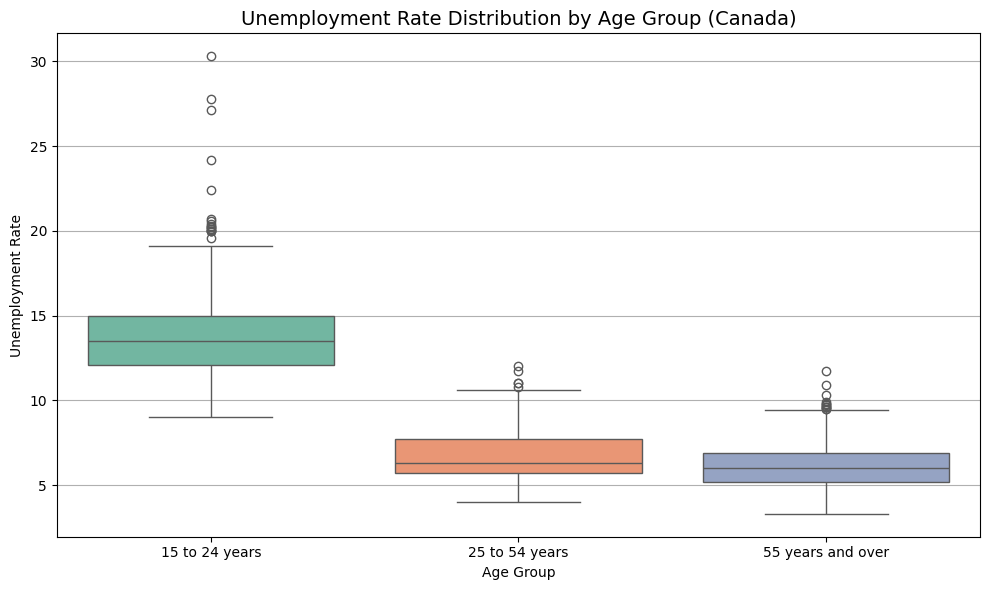

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# Filter for Canada
canada_df = df[df['GEO'] == 'Canada']
# Define the age group order optional
age_order = ["15 to 24 years", "25 to 54 years", "55 years and over"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=canada_df, x='Age group', y='Unemployment rate', order=age_order, palette='Set2')
plt.title('Unemployment Rate Distribution by Age Group (Canada)', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### B) Provincial Comparison

C:\Users\PROPIETARIO\AppData\Local\Temp\ipykernel_14452\1769276046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['REF_DATE'] = pd.to_datetime(filtered_df['REF_DATE'])


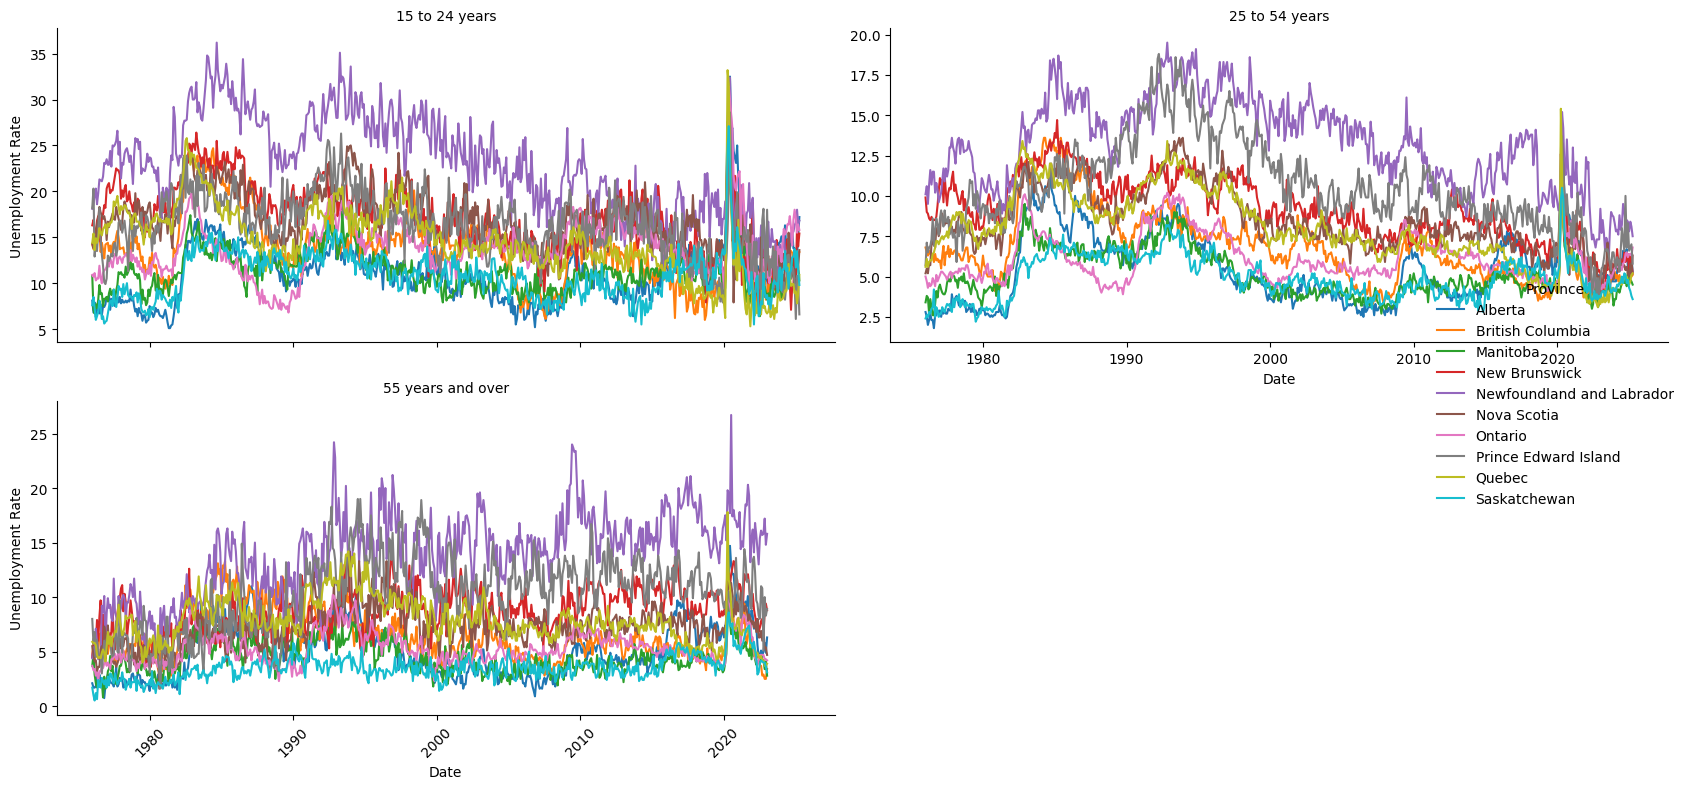

In [32]:

import matplotlib.pyplot as plt
import pandas as pd

# Filter only Canada-wide data by province (excluding total or missing)
filtered_df = df[(df['GEO'] != 'Canada') & (df['Age group'].isin(["15 to 24 years", "25 to 54 years", "55 years and over"]))]

# Ensure REF_DATE is datetime
filtered_df['REF_DATE'] = pd.to_datetime(filtered_df['REF_DATE'])

# Line plot with FacetGrid by Age Group
g = sns.FacetGrid(filtered_df, col="Age group", hue="GEO", col_wrap=2, height=4, aspect=1.8, sharey=False)
g.map(sns.lineplot, "REF_DATE", "Unemployment rate")
g.add_legend(title="Province")
g.set_axis_labels("Date", "Unemployment Rate")
g.set_titles("{col_name}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


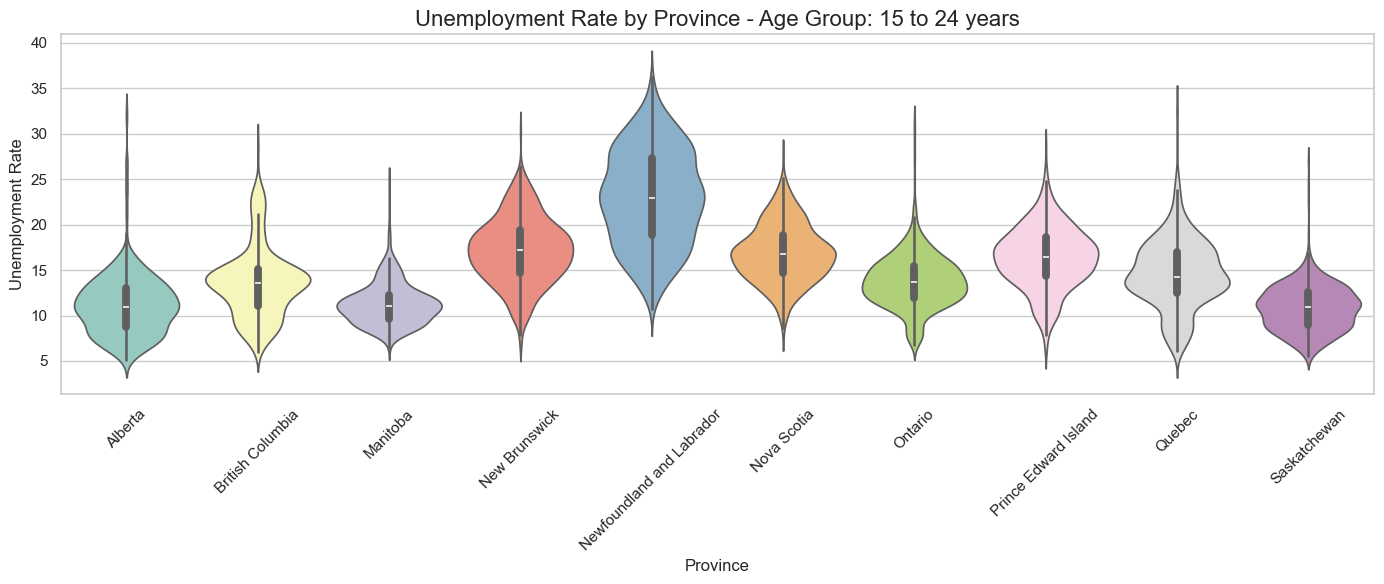

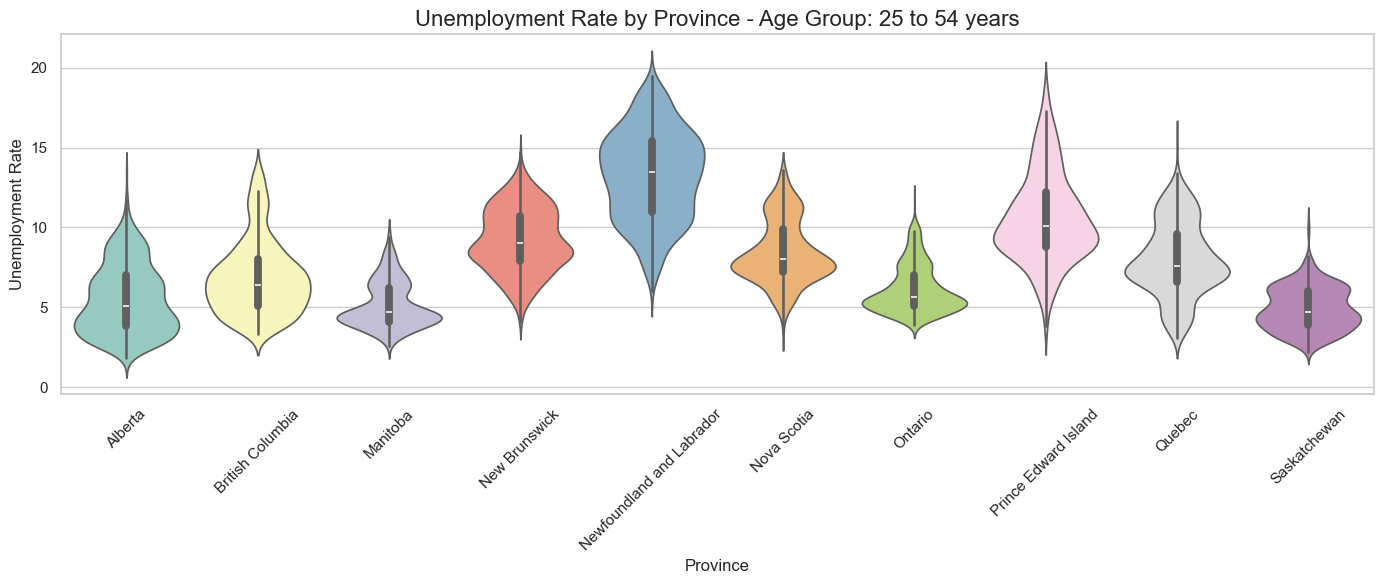

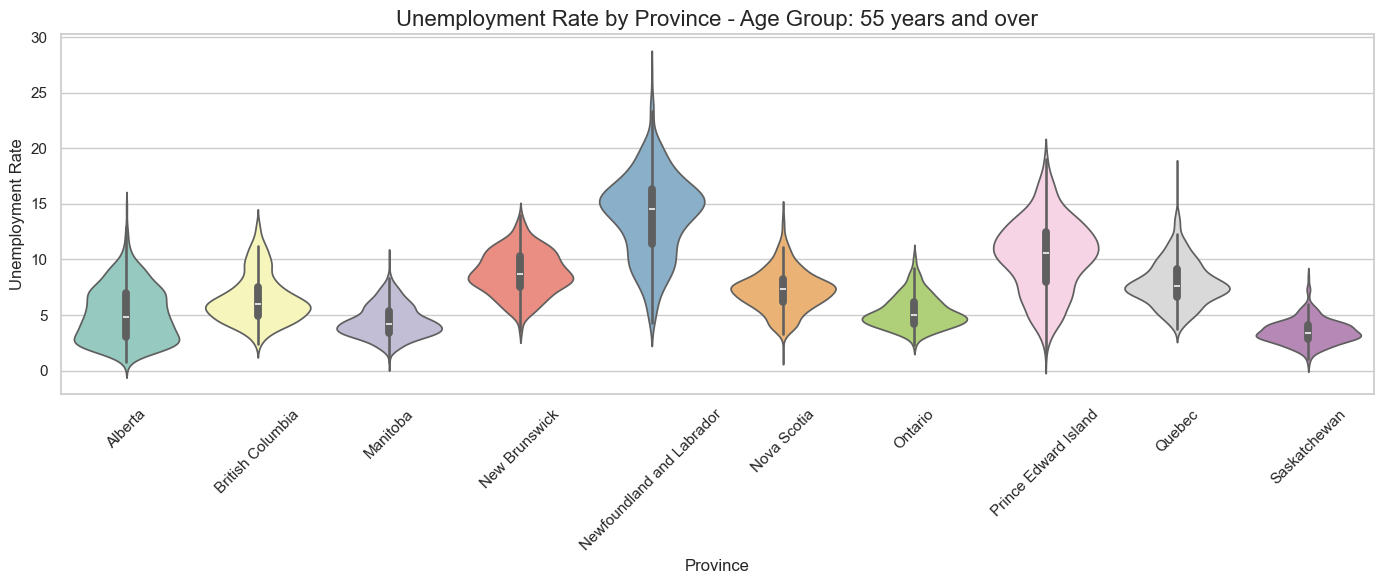

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the 3 age groups
age_groups = ["15 to 24 years", "25 to 54 years", "55 years and over"]

# Filter only those age groups and provinces
subset_df = df[
    (df['Age group'].isin(age_groups)) &
    (df['GEO'] != 'Canada') &
    (df['Unemployment rate'].notna())
].copy()

# Sort province names alphabetically for consistent order
province_order = sorted(subset_df['GEO'].unique())

# Set the Seaborn style
sns.set(style="whitegrid")

# Create one plot per age group
for age in age_groups:
    plt.figure(figsize=(14, 6))
    age_df = subset_df[subset_df['Age group'] == age]

    sns.violinplot(
        data=age_df,
        x="GEO",
        y="Unemployment rate",
        hue="GEO",
        order=province_order,
        palette="Set3",
        inner="box",
        dodge=False,
        legend=False
    )

    plt.title(f"Unemployment Rate by Province - Age Group: {age}", fontsize=16)
    plt.xticks(rotation=45)
    plt.xlabel("Province")
    plt.ylabel("Unemployment Rate")
    plt.tight_layout()
    plt.show()


### Seasonality 

Decomposition for Age Group: 15 to 24 years


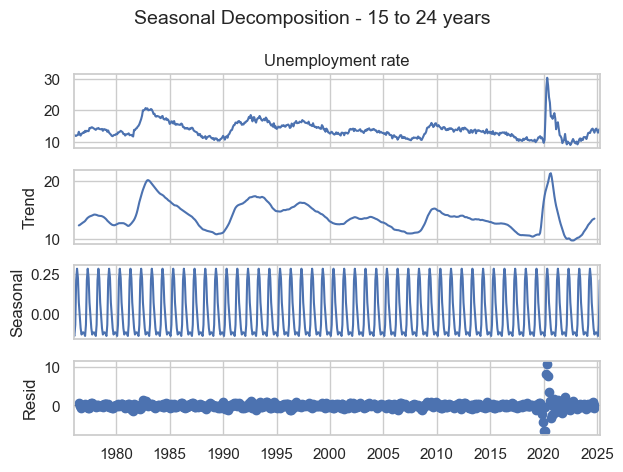

Decomposition for Age Group: 25 to 54 years


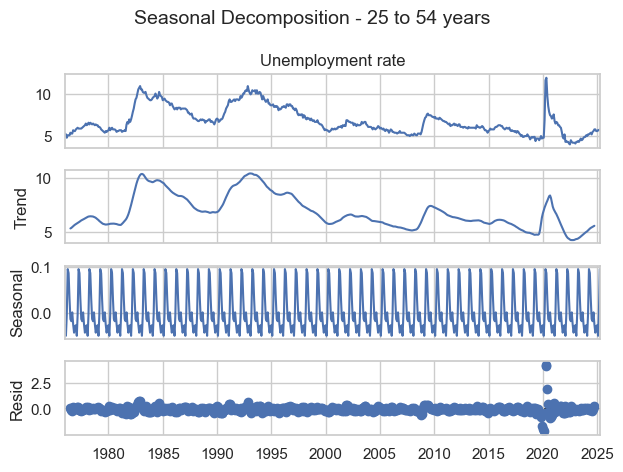

Decomposition for Age Group: 55 years and over


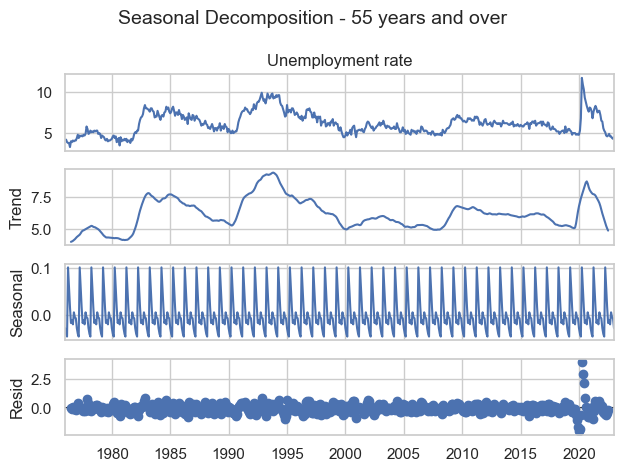

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Seasonal decomposition per age group
for age in age_groups:
    series = df[(df['GEO'] == 'Canada') & (df['Age group'] == age)]
    series = series.sort_values('REF_DATE')
    series['REF_DATE'] = pd.to_datetime(series['REF_DATE'])
    series.set_index('REF_DATE', inplace=True)
    ts = series['Unemployment rate'].dropna()

    decomposition = seasonal_decompose(ts, model='additive', period=12)  # monthly data
    print(f"Decomposition for Age Group: {age}")
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition - {age}", fontsize=14)
    plt.tight_layout()
    plt.show()



🔍 Analyzing ACF and PACF for Age Group: 15 to 24 years


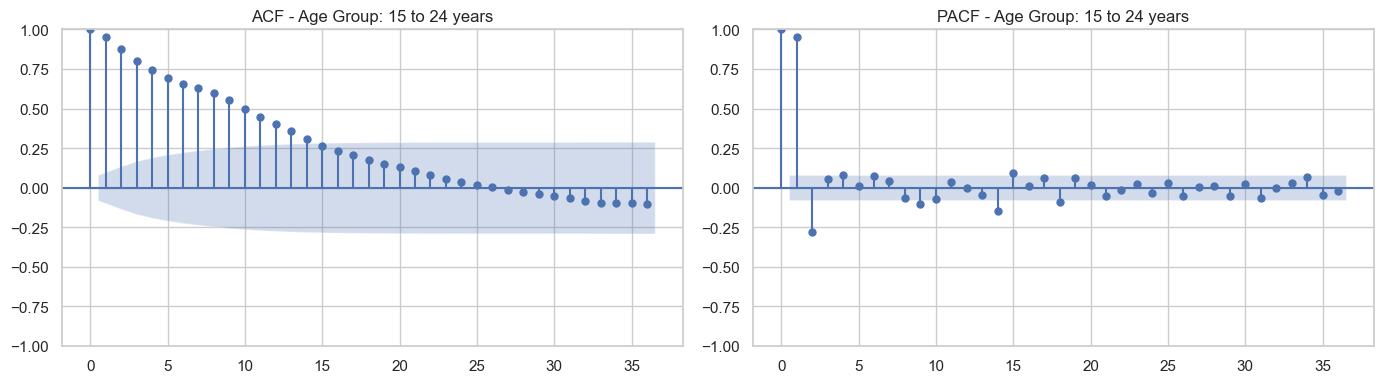


🔍 Analyzing ACF and PACF for Age Group: 25 to 54 years


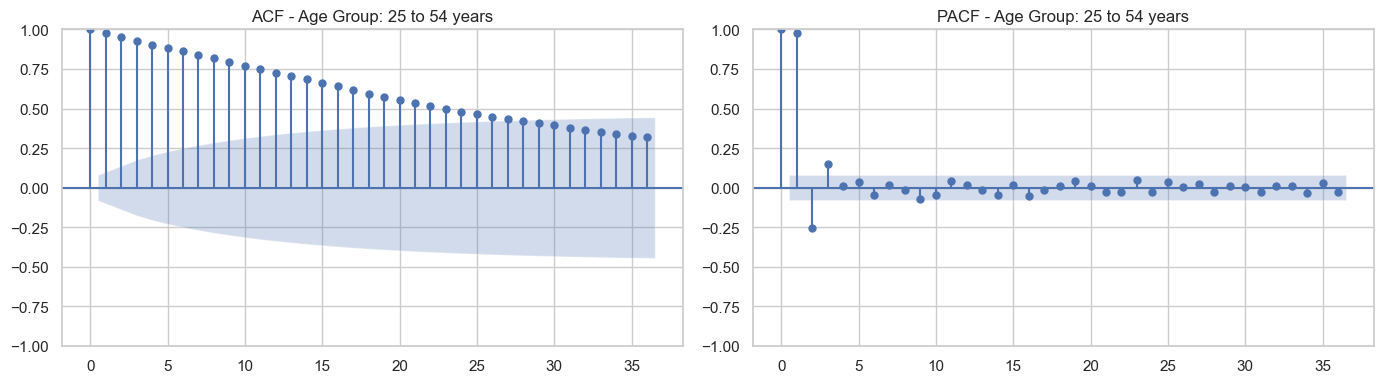


🔍 Analyzing ACF and PACF for Age Group: 55 years and over


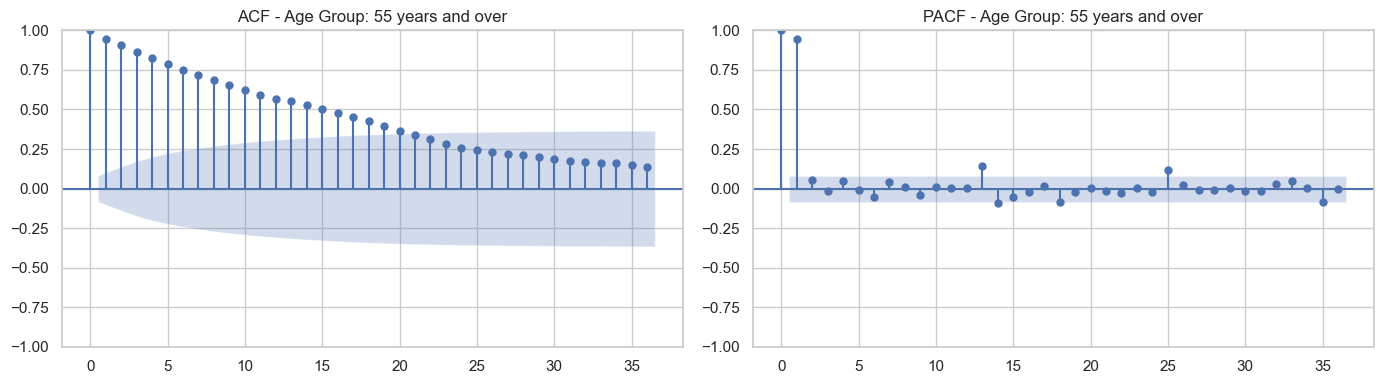

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ACF and PACF of unemployment series for each age group
for age_group in age_groups:
    print(f"\n🔍 Analyzing ACF and PACF for Age Group: {age_group}")
    
    # Filter and sort the data
    serie = df[(df['GEO'] == 'Canada') & (df['Age group'] == age_group)].sort_values(by='REF_DATE')
    serie['REF_DATE'] = pd.to_datetime(serie['REF_DATE'])
    serie.set_index('REF_DATE', inplace=True)
    unemployment_series = serie['Unemployment rate'].dropna()

    # Plot ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(unemployment_series, ax=axes[0], lags=36)
    axes[0].set_title(f"ACF - Age Group: {age_group}")

    plot_pacf(unemployment_series, ax=axes[1], lags=36, method='ywm')
    axes[1].set_title(f"PACF - Age Group: {age_group}")

    plt.tight_layout()
    plt.show()


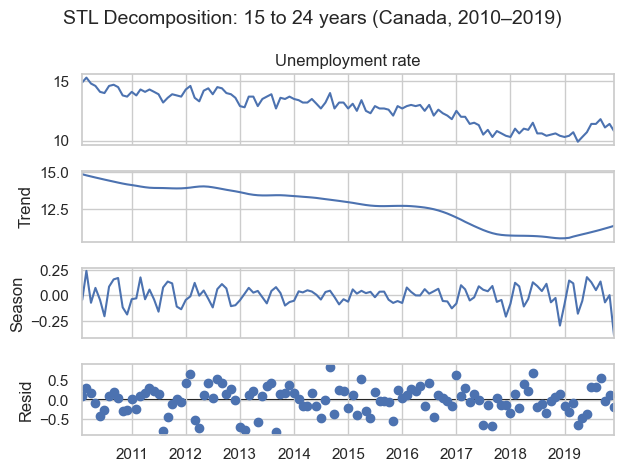

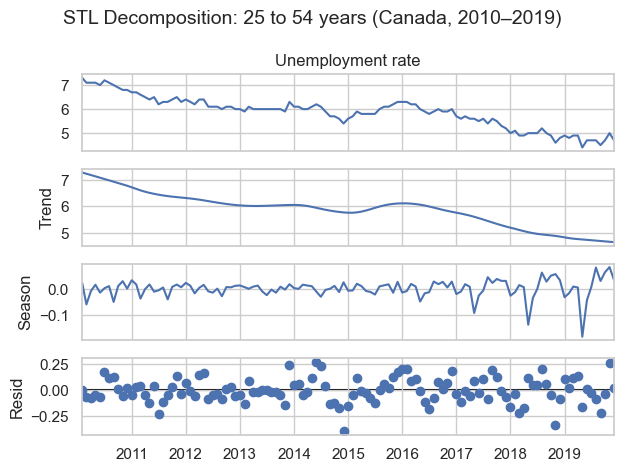

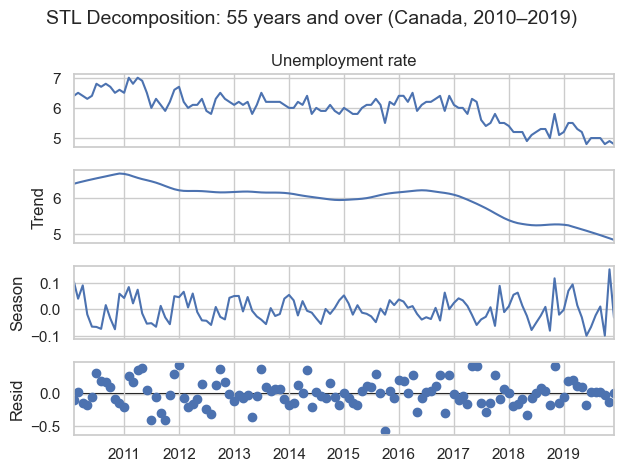

In [82]:
from statsmodels.tsa.seasonal import STL

# Loop through each age group
for age in age_groups:
    # Filter the data for Canada, specific age group, and pre-COVID period
    filtered = df[
        (df['GEO'] == 'Canada') &
        (df['Age group'] == age) &
        (df['REF_DATE'] >= '2010-01-01') &
        (df['REF_DATE'] <= '2019-12-31')
    ].copy()

    # Convert to datetime and sort
    filtered['REF_DATE'] = pd.to_datetime(filtered['REF_DATE'])
    filtered = filtered.sort_values(by='REF_DATE')
    filtered.set_index('REF_DATE', inplace=True)

    # Perform STL decomposition
    stl = STL(filtered["Unemployment rate"], seasonal=13)  # Monthly seasonality ~12
    result = stl.fit()

    # Plot results
    fig = result.plot()
    fig.suptitle(f"STL Decomposition: {age} (Canada, 2010–2019)", fontsize=14)
    plt.tight_layout()
    plt.show()




## 4. Data Engineering 

In [36]:
df['Population_growth_rate'] = (df.sort_values(by=['GEO', 'Age group', 'REF_DATE']).groupby(['GEO', 'Age group'])['Population'].pct_change() * 100)
df['Labour_force_growth_rate'] = (df.sort_values(by=['GEO', 'Age group', 'REF_DATE']).groupby(['GEO', 'Age group'])['Labour force'].pct_change() * 100)
df['Full_vs_Part_time_ratio'] = df['Full-time employment'] / df['Part-time employment']


In [37]:
df.head()

,REF_DATE,GEO,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate,Population_growth_rate,Labour_force_growth_rate,Full_vs_Part_time_ratio
0,1976-01,Alberta,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1,NaN,NaN,3.073814
1,1976-01,Alberta,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2,NaN,NaN,5.669992
2,1976-01,Alberta,15 years and over,819500.0,693700.0,856500.0,125800.0,1276700.0,37000.0,64.2,67.1,4.3,NaN,NaN,5.514308
3,1976-01,Alberta,25 to 54 years,491400.0,439800.0,505800.0,51600.0,661700.0,14400.0,74.3,76.4,2.8,NaN,NaN,8.523256
4,1976-01,Alberta,25 years and over,587700.0,518800.0,604200.0,68900.0,914400.0,16500.0,64.3,66.1,2.7,NaN,NaN,7.529753


In [38]:
df_noC = df[(df['GEO'] != "Canada") & (df['Age group'] == "15 to 24 years")]
df_noC_V= df_noC[['REF_DATE', 'GEO', 'Age group', 'Participation rate', 'Unemployment rate',
       'Population_growth_rate', 'Labour_force_growth_rate','Full_vs_Part_time_ratio']]
df_ind = df_noC_V.sort_values(by='REF_DATE').set_index('REF_DATE')


In [39]:
df_ind.to_csv('output.csv', index=True)

In [40]:
df_ind.head(15)

,GEO,Age group,Participation rate,Unemployment rate,Population_growth_rate,Labour_force_growth_rate,Full_vs_Part_time_ratio
REF_DATE,,,,,,,
1976-01,Alberta,15 to 24 years,69.6,8.1,NaN,NaN,3.073814
1976-01,British Columbia,15 to 24 years,64.3,14.2,NaN,NaN,2.872180
1976-01,Manitoba,15 to 24 years,68.3,10.8,NaN,NaN,4.012931
1976-01,New Brunswick,15 to 24 years,55.8,16.3,NaN,NaN,4.054688
1976-01,Newfoundland and Labrador,15 to 24 years,51.8,18.1,NaN,NaN,7.803571
1976-01,Nova Scotia,15 to 24 years,60.4,14.3,NaN,NaN,3.763006
1976-01,Ontario,15 to 24 years,65.1,10.9,NaN,NaN,3.130748
1976-01,Prince Edward Island,15 to 24 years,60.1,18.2,NaN,NaN,2.862069
1976-01,Quebec,15 to 24 years,59.9,14.4,NaN,NaN,5.318483


## 5. Machine Learning 

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#import shap

# Feature engineering
df_model = df_ind.copy()

# Convert index to datetime
df_model.index = pd.to_datetime(df_model.index)
# Add time-based features
df_model['month'] = df_model.index.month
df_model['year'] = df_model.index.year

features = ['Participation rate', 'Population_growth_rate',
            'Labour_force_growth_rate', 'Full_vs_Part_time_ratio', 'month']
target = 'Unemployment rate'

# Drop missing
df_model = df_model.dropna(subset=features + [target])
df_model = df_model.sort_index()

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


# Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

# Feature importances
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(importances)


R2 Score: -0.02162184209490947
Participation rate          0.639020
Population_growth_rate      0.138357
Full_vs_Part_time_ratio     0.124627
Labour_force_growth_rate    0.071613
month                       0.026383
dtype: float64
